# Data loading steps

1. 	Load the images and their corresponding XML annotation files. You can use a library such as Pillow to load images and xml.etree.ElementTree to parse the XML files.
2. 	Parse the XML annotation files to extract the coordinates of the bounding boxes for the objects of interest in each image. You can use the xml.etree.ElementTree library to do this.
3. 	Preprocess the images and their corresponding bounding boxes to prepare them for training. This can include tasks such as resizing the images to a consistent size, normalizing the pixel values, and converting the bounding box coordinates to a format that the neural network can understand (e.g., center coordinates and width/height).
4. 	Define your neural network architecture using PyTorch. There are many different architectures you can use for object detection, such as Faster R-CNN, YOLO, and SSD.
5. 	Define a loss function to train the network. For object detection, a common loss function is the mean average precision (mAP) loss.
6. 	Train the network using your training data. You can use PyTorch's built-in DataLoader class to load batches of images and their corresponding bounding boxes, and PyTorch's optim module to define and optimize the network's parameters.
7. 	Evaluate the performance of your trained network on a validation set using metrics such as mAP and IoU (intersection over union).
8. 	Fine-tune the network as needed based on the evaluation results, and repeat the training and evaluation steps until you achieve satisfactory performance.
9. 	Once you have a trained network, you can use it to make predictions on new images by feeding them through the network and using the output to generate bounding boxes for the objects of interest.

### 1. Load the images and their corresponding XML annotation files. 
* You can use a library such as Pillow to load images and xml.etree.ElementTree to parse the XML files.

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import torch
import cv2
from matplotlib.patches import Rectangle
import AngioDataset#, Train, Model
from AngioDataset import MyDataset

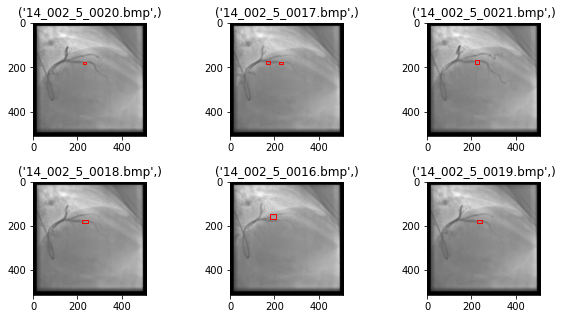

In [2]:
img_dir = '../sample_data/image_dir'
xml_dir = '../sample_data/xml_dir'
dataset = MyDataset(img_dir=img_dir, xml_dir=xml_dir)
my_dataloader = torch.utils.data.DataLoader(dataset)

fig, axs = plt.subplots(2, 3, figsize=(10, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i, (name, image, bboxes) in enumerate(my_dataloader):

    # set the image in the subplot
    image = image[0]
    ax = axs.flatten()[i]
    ax.imshow(image)
    ax.set_title(f"{name}")

    # Add bounding boxes
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = [t.item() for t in bbox]
        width = xmax - xmin
        height = ymax - ymin
        rect = Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
